In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [2]:
img = cv.imread("/Users/miguelcamargorojas/Documents/UP/PDI - Ene-may24/images/detect_blob.png")
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

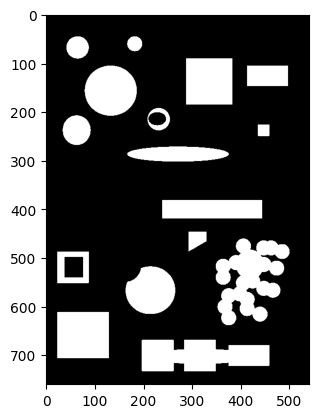

In [3]:
img_bin = cv.threshold(img_gray, 80, 255, cv.THRESH_BINARY)[1]
plt.imshow(img_bin, "gray")
plt.show()

In [4]:
output = cv.connectedComponentsWithStats(img_bin)

In [5]:
output

(18,
 array([[1, 1, 1, ..., 1, 1, 1],
        [1, 0, 0, ..., 0, 0, 1],
        [1, 0, 0, ..., 0, 0, 1],
        ...,
        [1, 0, 0, ..., 0, 0, 1],
        [1, 0, 0, ..., 0, 0, 1],
        [1, 0, 0, ..., 0, 0, 1]], dtype=int32),
 array([[     1,      1,    539,    759, 318496],
        [     0,      0,    541,    760,   2059],
        [    42,     46,     46,     46,   1662],
        [   166,     46,     31,     31,    748],
        [   287,     91,     95,     95,   9025],
        [    79,    106,    107,    103,   8694],
        [   412,    106,     84,     42,   3528],
        [   208,    193,     46,     46,    905],
        [    34,    208,     58,     61,   2757],
        [   434,    227,     24,     24,    574],
        [   166,    272,    209,     31,   5131],
        [   238,    382,    205,     38,   7790],
        [   292,    447,     37,     41,   1125],
        [   348,    461,    151,    178,  14919],
        [    23,    488,     65,     65,   2628],
        [   163,   

In [6]:
(numLabels, labels, stats, centroids) = output

In [7]:
numLabels

18

In [8]:
np.unique(labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17], dtype=int32)

In [22]:
output = img.copy()

# loop over the number of unique connected component labels
for i in range(1, numLabels):
	# if this is the first component then we examine the
	# *background* (typically we would just ignore this
	# component in our loop)
	# if i == 0:
	# 	text = "examining component {}/{} (background)".format(
	# 		i + 1, numLabels)
	# otherwise, we are examining an actual connected component
	# else:
    text = "examining component {}/{}".format( i + 1, numLabels)
	# print a status message update for the current connected
	# component
    print("[INFO] {}".format(text))
	# extract the connected component statistics and centroid for
	# the current label
    x = stats[i, cv.CC_STAT_LEFT]
    y = stats[i, cv.CC_STAT_TOP]
    w = stats[i, cv.CC_STAT_WIDTH]
    h = stats[i, cv.CC_STAT_HEIGHT]
    area = stats[i, cv.CC_STAT_AREA]
    (cX, cY) = centroids[i]

    if area > 1500:
        cv.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 3)
        cv.circle(output, (int(cX), int(cY)), 4, (0, 0, 255), -1)

    # construct a mask for the current connected component by
    # finding a pixels in the labels array that have the current
    # connected component ID
    componentMask = (labels == i).astype("uint8") * 255
    # show our output image and connected component mask


[INFO] examining component 2/18
[INFO] examining component 3/18
[INFO] examining component 4/18
[INFO] examining component 5/18
[INFO] examining component 6/18
[INFO] examining component 7/18
[INFO] examining component 8/18
[INFO] examining component 9/18
[INFO] examining component 10/18
[INFO] examining component 11/18
[INFO] examining component 12/18
[INFO] examining component 13/18
[INFO] examining component 14/18
[INFO] examining component 15/18
[INFO] examining component 16/18
[INFO] examining component 17/18
[INFO] examining component 18/18


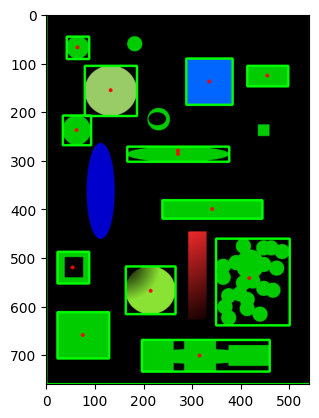

In [23]:
plt.imshow(output[:,:,::-1], "gray")